<a href="https://colab.research.google.com/github/1dgog/TC3006C_portafolio_m2/blob/main/a01139500_m2_retro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Módulo 2 Implementación de una técnica de aprendizaje máquina sin el uso de un framework

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")
!pwd
#put your own path in google drive
%cd "/content/gdrive/MyDrive"
!ls

Mounted at /content/gdrive
/content
/content/gdrive/MyDrive
'Colab Notebooks'     gender_submission.csv   Portugues		 Valhalla23.csv
'Documentos utiles'   iris.data		     'Servicio Social'	 wine.data
 EBSCO		      iris.names	     'Sin ordenar'	 wine.names
 EGSGLP		      LiFE		      test.csv
 Fotos		     'Plan de estudios'       train.csv


Se importan las librerías necesarias. sklearn solo se usa para hacer la división de datos de entrenamiento y prueba.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import math
from sklearn.metrics import classification_report
import seaborn as sns

In [ ]:
columns = ["alcohol","malic_acid","ash","alcalinity_of_ash", "magnesium","total_phenols","flavanoids","nonflavanoid_phenols","proanthocyanins","color_intensity","hue","od280","proline"] # definir nombres de columna manualmente
df = pd.read_csv('wine.data',names = columns) # abrir el archivo de datos con los nombres dados para las columnas
df2 = df.reset_index() # se añade un nuevo indice para que el indice previo sea una clasificación que se usara en la siguiente figura.
df2

,index,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


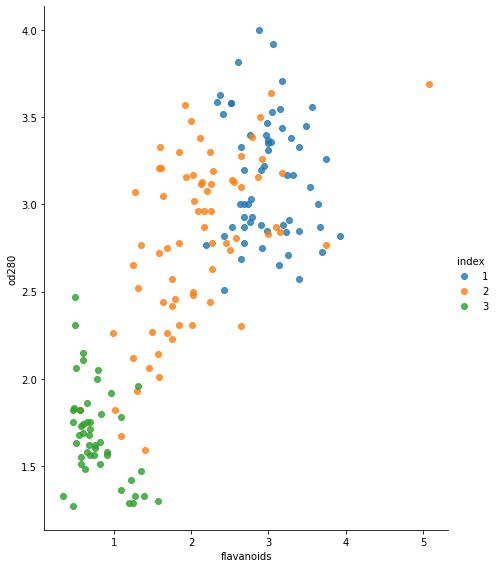

In [ ]:
sns.lmplot(x='flavanoids',
           y='od280',
           height=8,
           aspect=.8,
           data = df2,
           fit_reg=False, 
           hue='index', 
           legend=True)

Se hace la separación de datos de entrenamiento y de prueba.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df["flavanoids"], 
                                                    df["od280"], 
                                                    test_size=0.33, 
                                                    random_state=30)

Se hace una regresión logística de orden 1.

In [ ]:
h   = lambda x,theta: theta[0]+theta[1]*x
j_i = lambda x,y,theta: (y-h(x,theta))**2 

alpha = 0.00001

n = len(y_train)

In [ ]:
theta = [1,1] # Cambiar dependiendo del orden del modelo (un theta para cada dimensión de nuestros datos + 1)

for idx in range(10000):
  acumDelta = []
  acumDeltaX = []
  for x_i, y_i in zip(x_train,y_train):
    acumDelta.append(h(x_i,theta)-y_i)
    acumDeltaX.append((h(x_i,theta)-y_i)*x_i)

  sJt0 = sum(acumDelta)  
  sJt1 = sum(acumDeltaX)
  theta[0] = theta[0]-alpha/n*sJt0
  theta[1] = theta[1]-alpha/n*sJt1

print(theta)

[0.9694166681305363, 0.8946510827226222]


In [ ]:
n_train = len(y_train)
n_test = len(y_test)

# Validación
acumDelta = []
for x_i, y_i in zip(x_test,y_test):
  acumDelta.append(j_i(x_i,y_i,theta))  

sDelta = sum(acumDelta)  
J_test = 1/(2*n_test)*sDelta


# Training
acumDelta = []
for x_i, y_i in zip(x_train,y_train):
  acumDelta.append(j_i(x_i,y_i,theta))  

sDelta = sum(acumDelta)  
J_train = 1/(2*n_train)*sDelta

print(J_test)
print(J_train)
print(theta)

0.11283639330352326
0.1924030240135738
[0.9694166681305363, 0.8946510827226222]


In [ ]:
def funcion_de_clasificacion(x_train,y_train)